<h1 style={"color:red"}>CRISP DM model</h1>
    <p>This model is a very well defined model that provides us with a lot of stability of work. This is a framework that has a structured approach to tackling data-driven problems.<br><br>It has 6 stages:<br></p>
    <ol>
        <li>Business Understanding</li>
        <li>Data Understanding</li>
        <li>Data preparation</li>
        <li>Modelling</li>
        <li>Evaluation</li>
        <li>Deployment</li>
    </ol>
    


# 1. Business Undestanding
    This step involves understanding the customer requirements and the problems that we have to deal with, like the duration of the data available to us, the model type, the data quality provided, and what are the features we need and are provided to use while forecasting the later results.

# 2. Data Understanding
    This involves analysis of the data like finding correlation between different categories(columns).
    To do this we use various plots like lineplot, violinplot and heatmaps. 
    This helps in understanding the data better and visualizing it.

In [1]:
import pandas as pd

In [2]:
data_frame = pd.read_csv('./regression.csv')

In [3]:
data_frame.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [4]:
for col in data_frame.columns:
    print(col, len(data_frame[col].unique()), data_frame[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [5]:
data_frame.describe() ### to provide a stern description of our data frame. To include objects write inside()"include='objects'

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [6]:
data_frame.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

### Visualization of Data

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

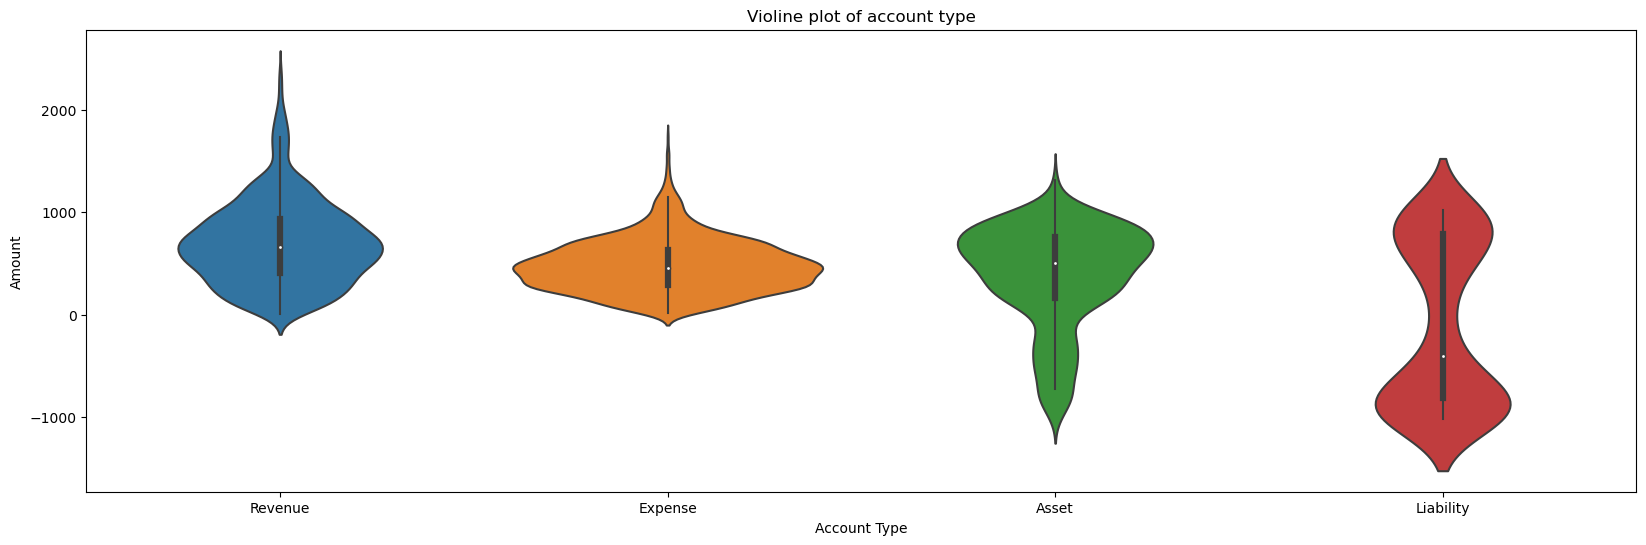

In [8]:
plt.figure(figsize=(20,6))
sns.violinplot(x = 'Account Type', y = 'Amount', data = data_frame).set_title('Violine plot of account type')
plt.show()

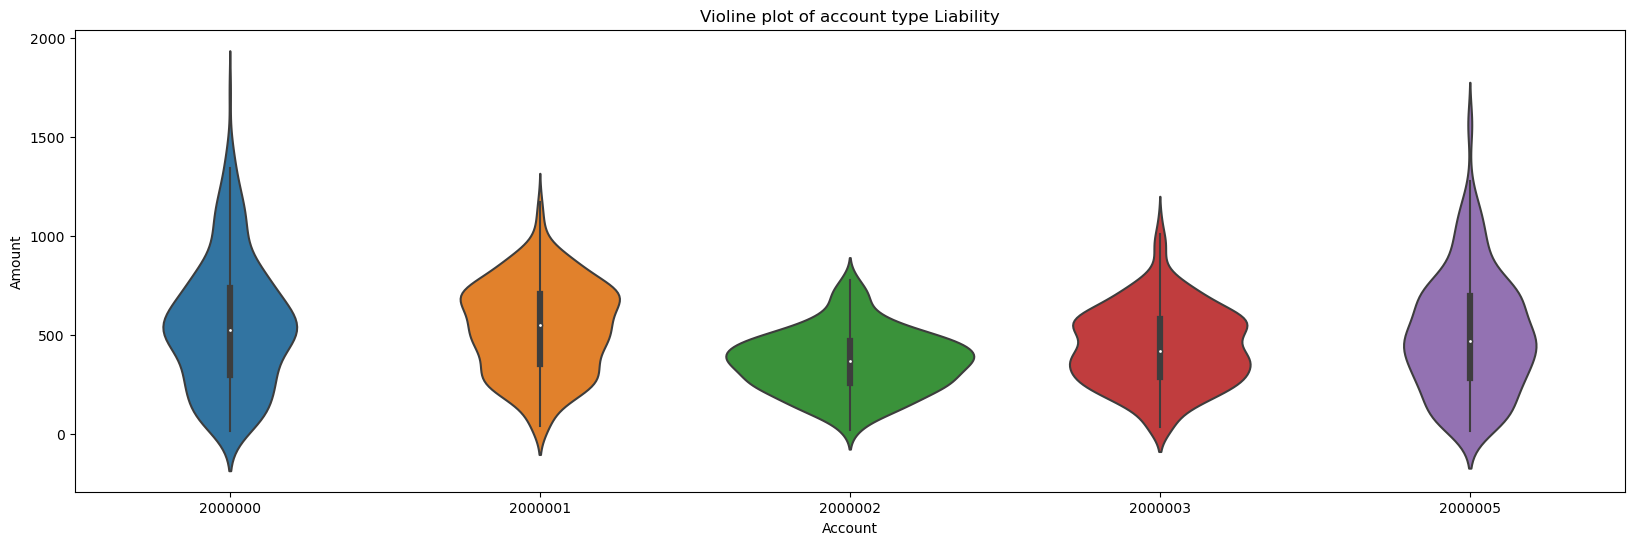

In [9]:
plt.figure(figsize=(20,6))
sns.violinplot(x = 'Account', y = 'Amount', data = data_frame[data_frame['Account Type']=='Expense']).set_title('Violine plot of account type Liability')
plt.show()

### Reviewing Trends

In [10]:
data_frame.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [11]:
months = {
    'Jan' : 1,
    'Feb' : 2,
    'Mar' : 3,
    'Apr' : 4,
    'May' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Aug' : 8,
    'Sep' : 9,
    'Oct' : 10,
    'Nov' : 11,
    'Dec' : 12
}

In [12]:
### we are going to create new columns day, month, and date to help us in data analysis and correlating our data
data_frame['Period'] = data_frame['Month'].apply(lambda x: months[x])
data_frame['Day'] = 1
data_frame['Date'] =  data_frame['Year'].astype(str)+ "/" + data_frame['Period'].astype(str) +"/"+ data_frame['Day'].astype(str)
data_frame.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019/1/1
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019/1/1
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019/1/1
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019/1/1
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019/1/1


In [13]:
data_frame['Date'] = pd.to_datetime(data_frame['Date']) ### to convert it into the date time dtype from the object type

In [14]:
data_frame.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

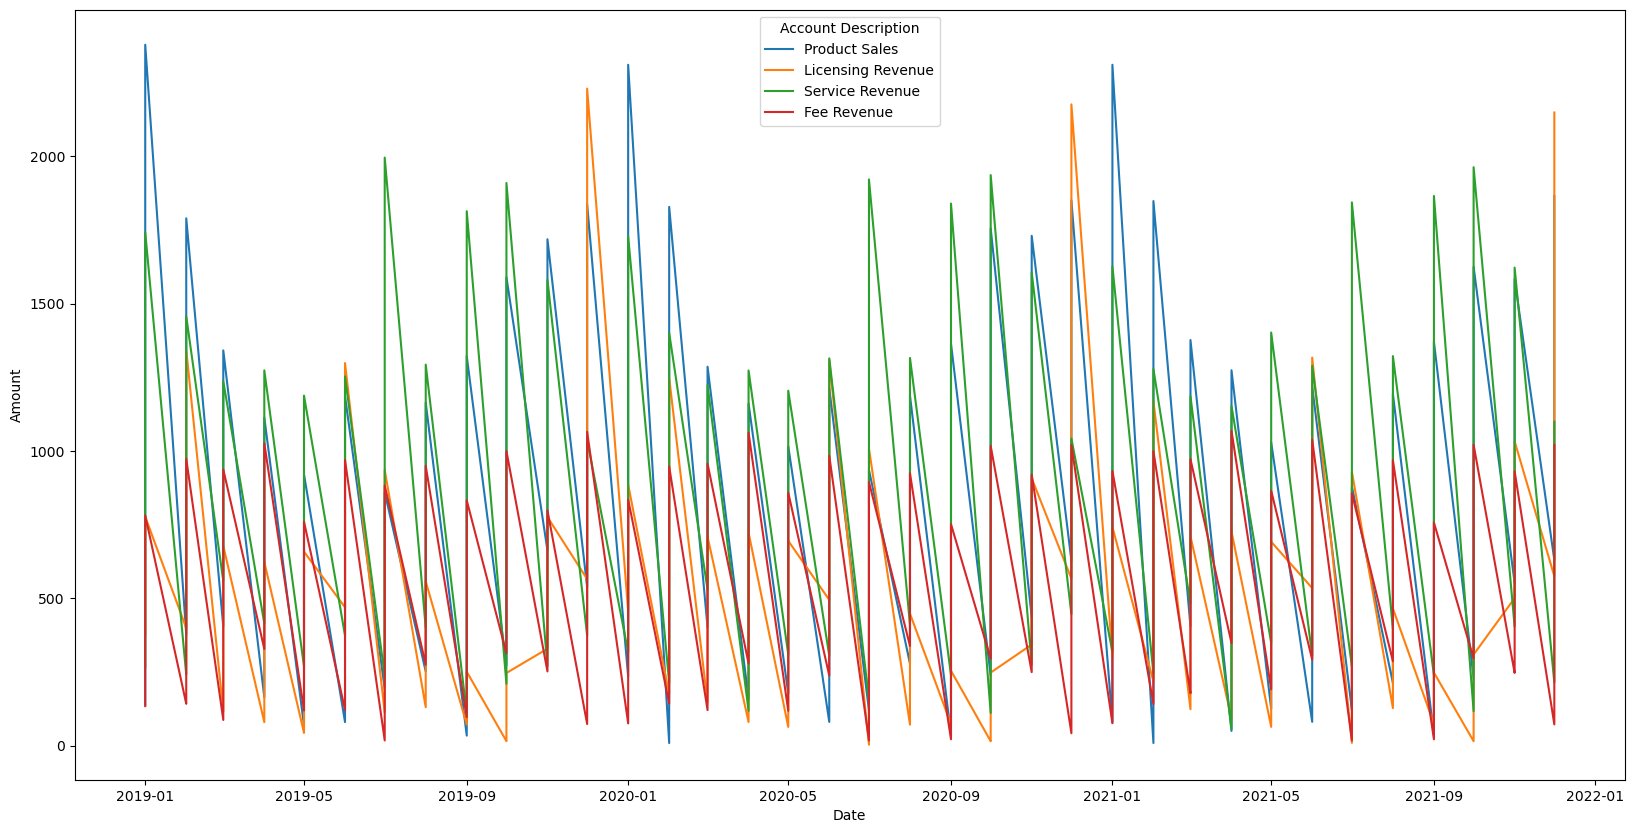

In [15]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'Date', y='Amount', hue="Account Description", estimator = None, data = data_frame[data_frame['Account Type'] == 'Revenue'])
plt.show()

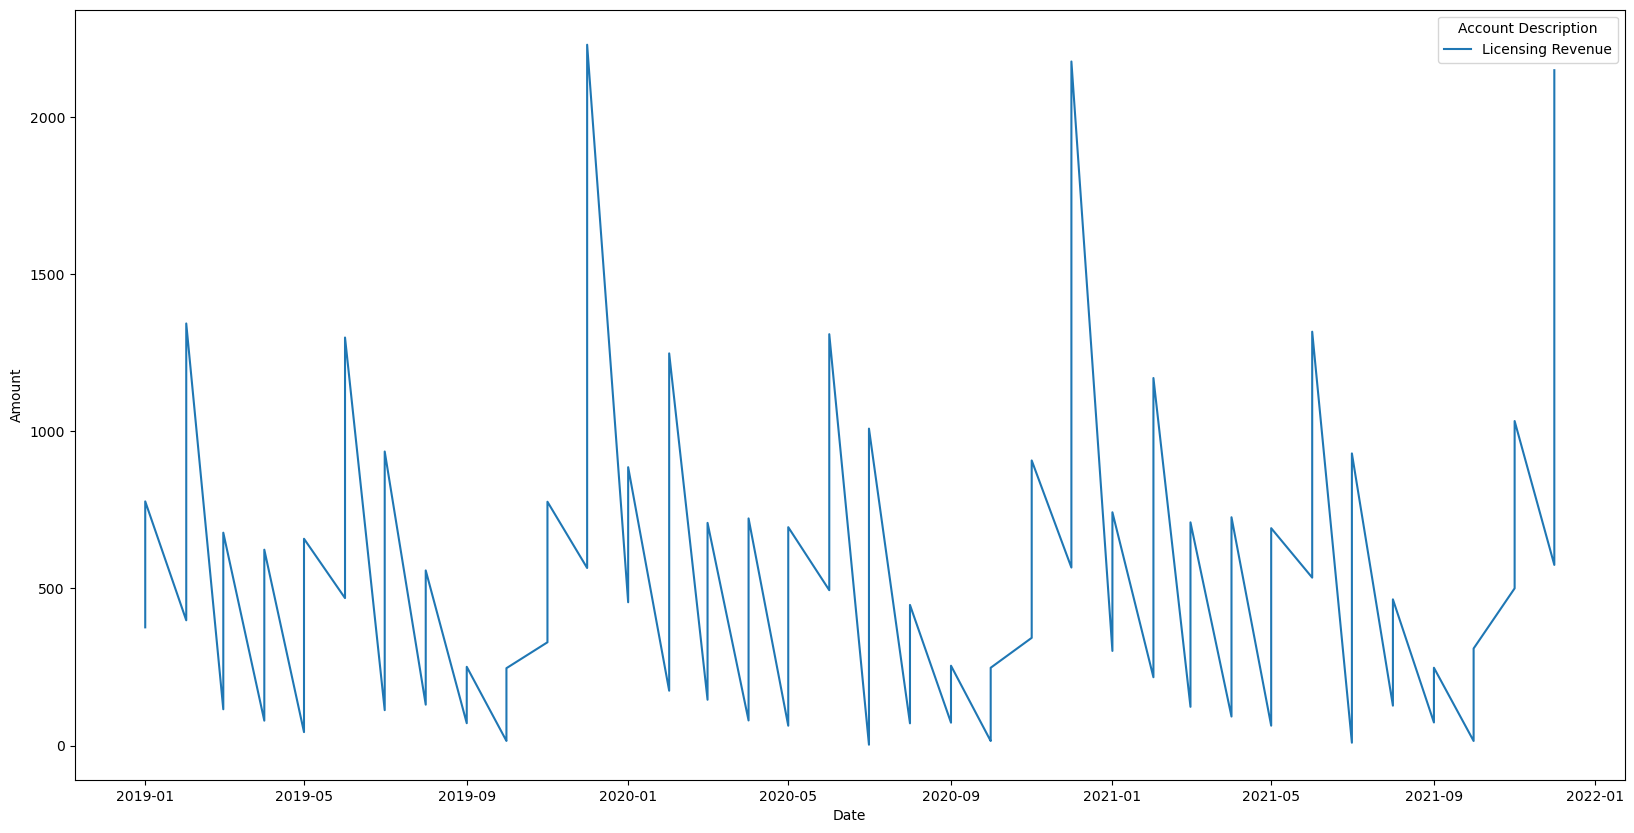

In [16]:
### to get a more distinguished viewing of the graph
plt.figure(figsize = (20,10))
sns.lineplot(x = 'Date', y='Amount', hue="Account Description", color="black", estimator = None, data = data_frame[data_frame['Account Description'] == 'Licensing Revenue'])
plt.show()

### Correlation

In [17]:
data_frame["Account Description"].unique()

array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Inventory', 'Accounts Receivable',
       'Accounts Payable'], dtype=object)

In [18]:
pd.get_dummies(data_frame['Account'], dtype=int)

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0,0,0,0,0,0,0,0,1,0,0,0,0
4208,0,0,0,0,0,0,0,0,0,1,0,0,0
4209,0,0,0,0,0,0,0,0,0,0,1,0,0
4210,0,0,0,0,0,0,0,0,0,0,0,1,0


In [19]:
data_frame.join(pd.get_dummies(data_frame['Account'], dtype=int))

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date,...,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01,...,0,0,0,0,0,0,0,0,0,0
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01,...,0,0,0,0,0,0,0,0,0,0
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01,...,0,0,0,0,0,0,0,0,0,0
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01,...,1,0,0,0,0,0,0,0,0,0
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121,12,1,2021-12-01,...,0,0,0,0,0,1,0,0,0,0
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056,12,1,2021-12-01,...,0,0,0,0,0,0,1,0,0,0
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478,12,1,2021-12-01,...,0,0,0,0,0,0,0,1,0,0
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680,12,1,2021-12-01,...,0,0,0,0,0,0,0,0,1,0


In [20]:
corrdict = {}
for key, row in data_frame.join(pd.get_dummies (data_frame['Account'])).iterrows ():
    corrdict[key] = {int(row['Account']):row['Amount']}

In [21]:
corr_frame = pd.DataFrame.from_dict(corrdict).T.fillna(0)

In [22]:
corr_frame.corr()

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
1000000,1.000000,-0.058293,-0.065252,-0.064706,-0.061763,-0.066141,-0.065989,-0.065547,-0.061377,0.007528,-0.070332,-0.060539,0.010549
1000001,-0.058293,1.000000,-0.060742,-0.060233,-0.057494,-0.061569,-0.061428,-0.061016,-0.057135,0.007007,-0.065471,-0.056355,0.009820
1000002,-0.065252,-0.060742,1.000000,-0.067424,-0.064358,-0.068920,-0.068762,-0.068301,-0.063956,0.007844,-0.073287,-0.063083,0.010992
1000004,-0.064706,-0.060233,-0.067424,1.000000,-0.063819,-0.068343,-0.068186,-0.067728,-0.063420,0.007778,-0.072673,-0.062555,0.010900
2000000,-0.061763,-0.057494,-0.064358,-0.063819,1.000000,-0.065235,-0.065085,-0.064648,-0.060536,0.007424,-0.069369,-0.059710,0.010404
2000001,-0.066141,-0.061569,-0.068920,-0.068343,-0.065235,1.000000,-0.069699,-0.069231,-0.064827,0.007951,-0.074286,-0.063942,0.011142
2000002,-0.065989,-0.061428,-0.068762,-0.068186,-0.065085,-0.069699,1.000000,-0.069072,-0.064679,0.007933,-0.074115,-0.063796,0.011116
2000003,-0.065547,-0.061016,-0.068301,-0.067728,-0.064648,-0.069231,-0.069072,1.000000,-0.064244,0.007879,-0.073618,-0.063368,0.011041
2000005,-0.061377,-0.057135,-0.063956,-0.063420,-0.060536,-0.064827,-0.064679,-0.064244,1.000000,0.007378,-0.068935,-0.059337,0.010339
3000000,0.007528,0.007007,0.007844,0.007778,0.007424,0.007951,0.007933,0.007879,0.007378,1.000000,0.008455,0.007277,-0.001268


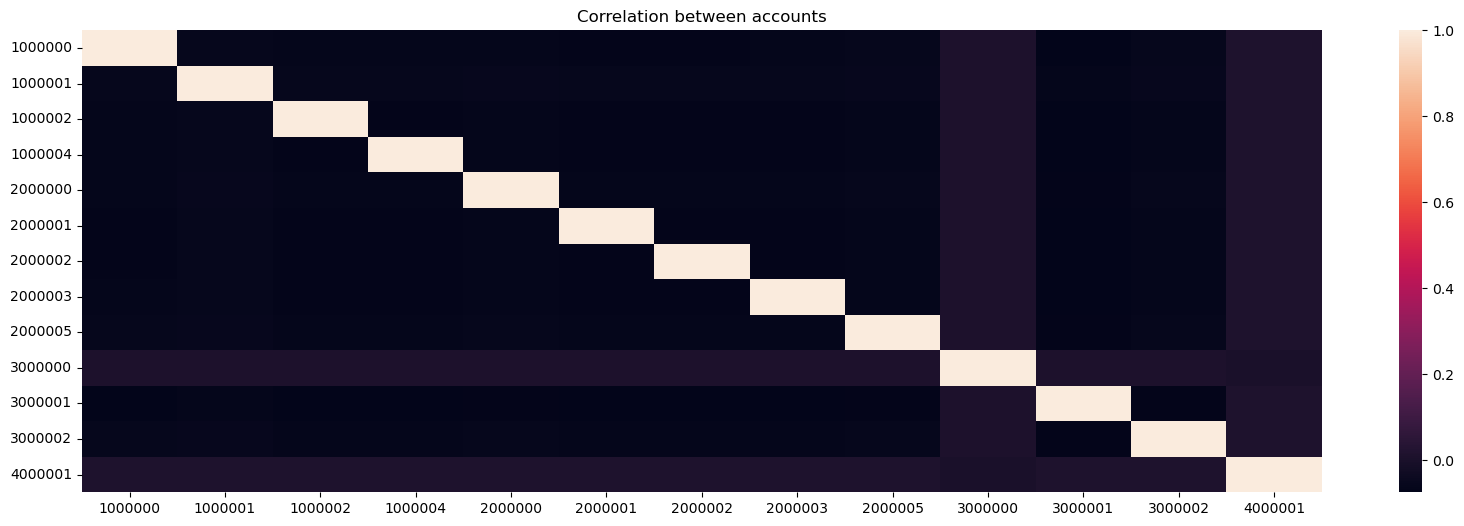

In [23]:
plt.figure(figsize=(20,6))
sns.heatmap(corr_frame.corr()).set_title('Correlation between accounts') ### this is the best kind of map used for visualizing correlation in ML
plt.show()

In [24]:
data_frame[data_frame['Account'] == 3000001]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
10,2019,Jan,CC100,3000001,Inventory,Asset,980.000,1,1,2019-01-01
23,2019,Jan,CC101,3000001,Inventory,Asset,980.000,1,1,2019-01-01
36,2019,Jan,CC102,3000001,Inventory,Asset,980.000,1,1,2019-01-01
49,2019,Jan,CC200,3000001,Inventory,Asset,982.000,1,1,2019-01-01
62,2019,Jan,CC201,3000001,Inventory,Asset,980.000,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4157,2021,Dec,CC201,3000001,Inventory,Asset,444.412,12,1,2021-12-01
4170,2021,Dec,CC202,3000001,Inventory,Asset,294.621,12,1,2021-12-01
4183,2021,Dec,CC300,3000001,Inventory,Asset,612.250,12,1,2021-12-01
4196,2021,Dec,CC301,3000001,Inventory,Asset,377.243,12,1,2021-12-01


## 3. Data Preparation
    This helps in perfoming the final adjustments to the data set before preparing the model.
    In this stage we combine, drop and alter the rows for our convinience towards making the model.
    This helps in removing the redundant data or the data that is not essential for modelling and helps the 
    model in making predictions faster.

In [25]:
import numpy as np

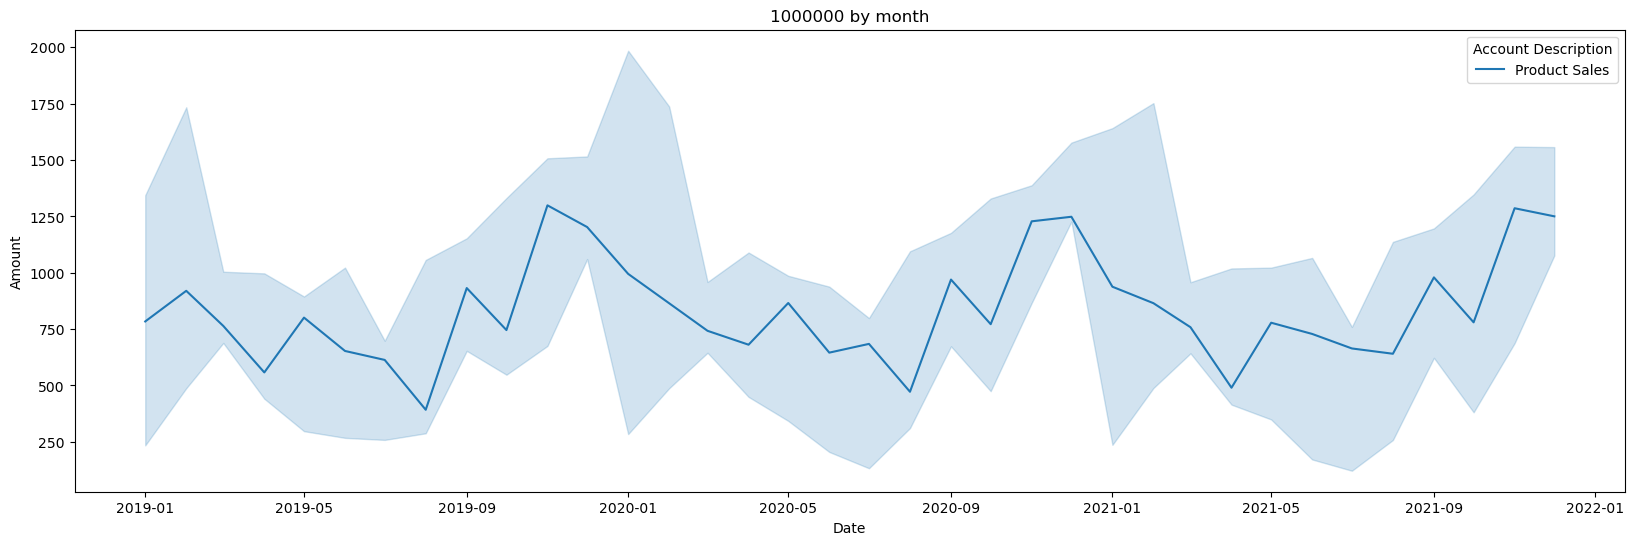

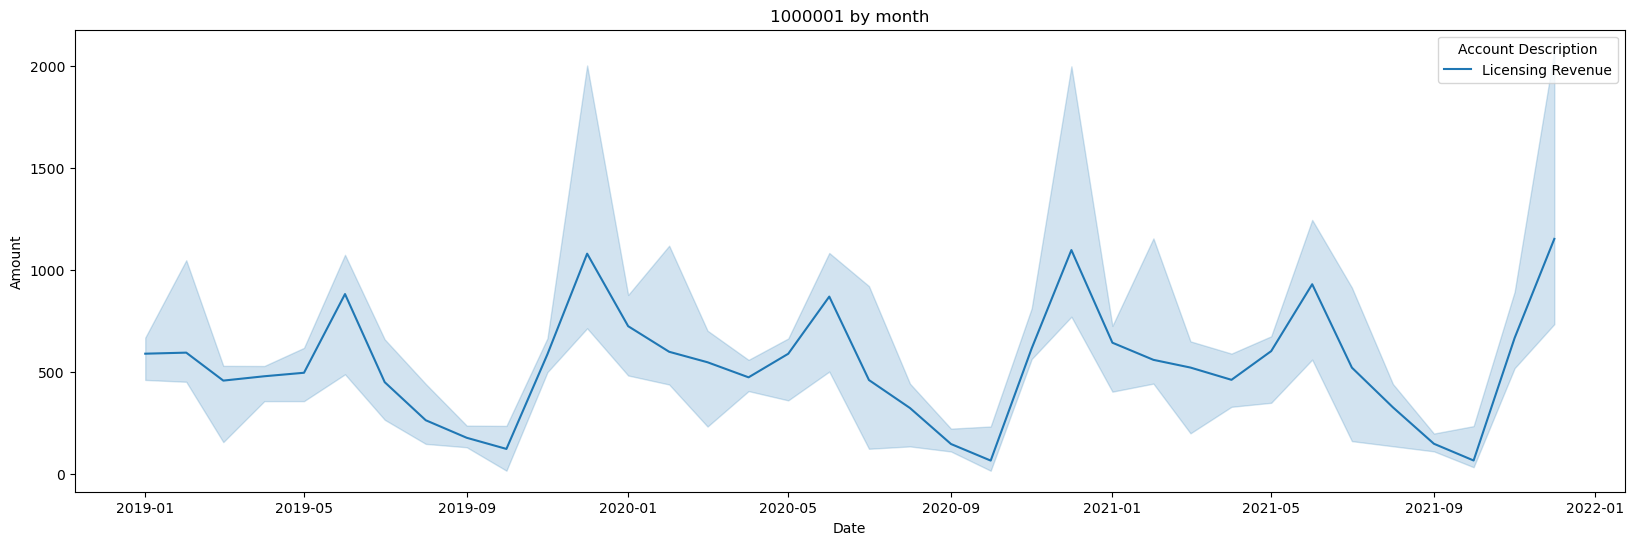

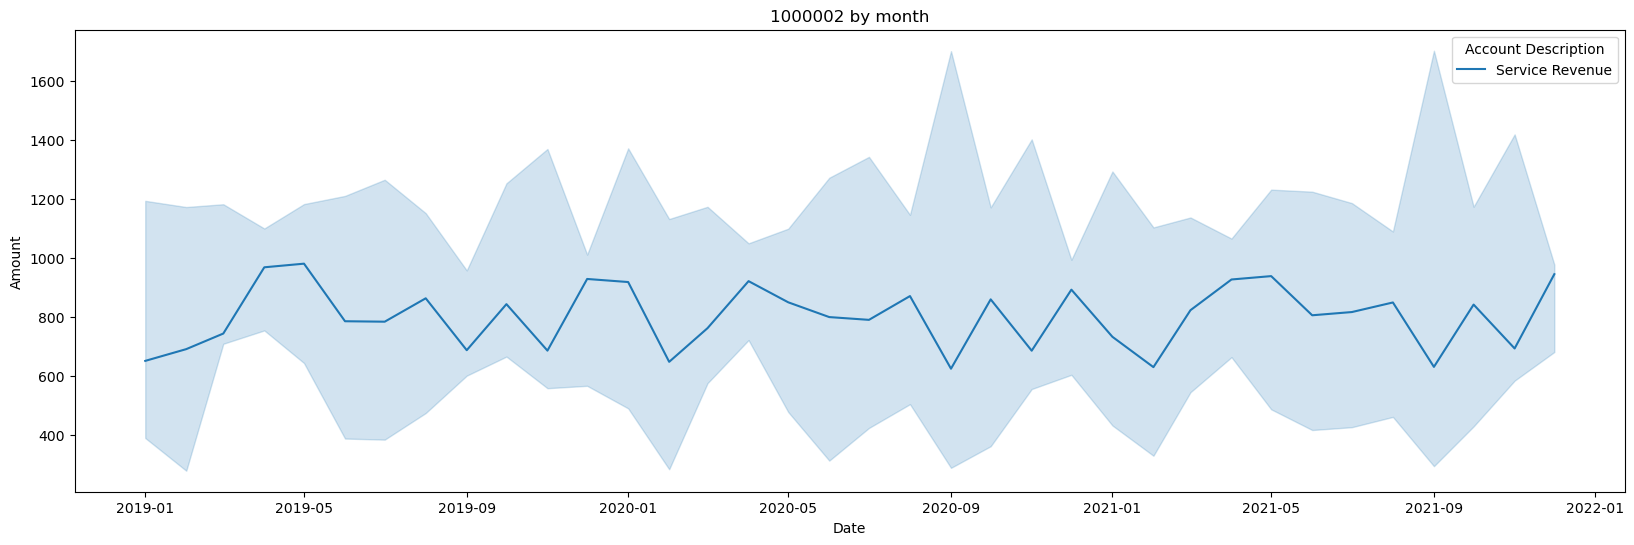

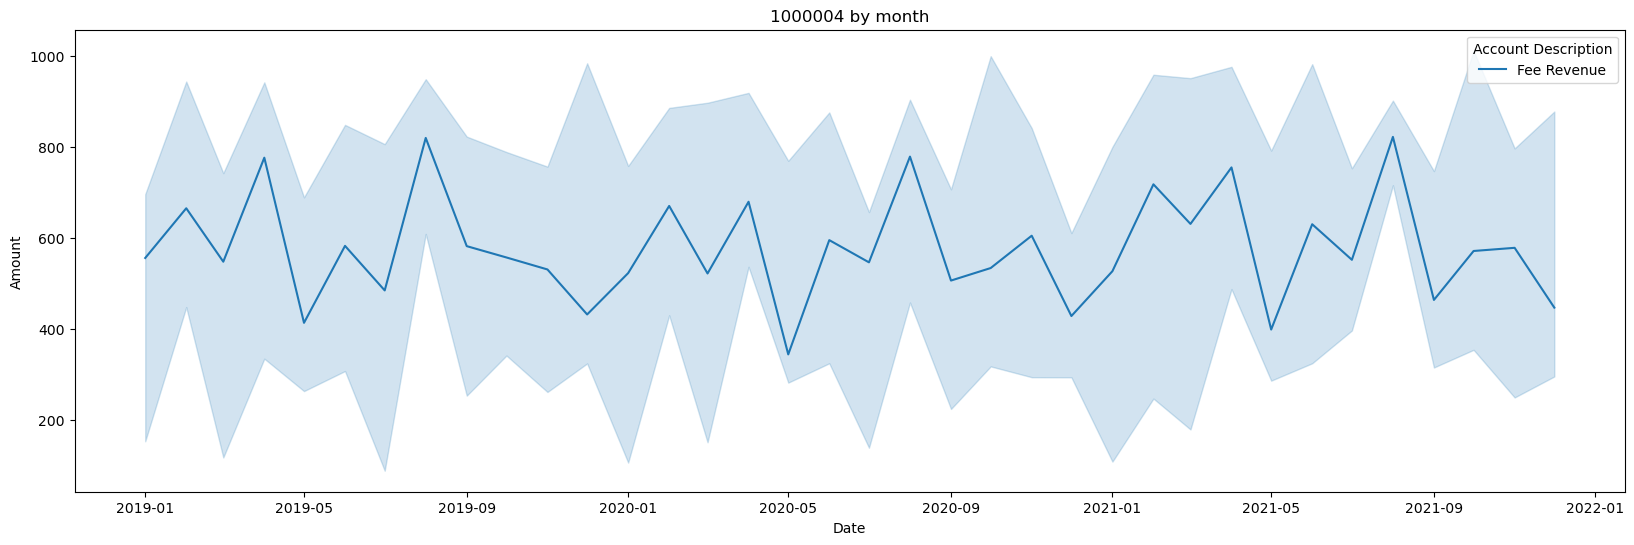

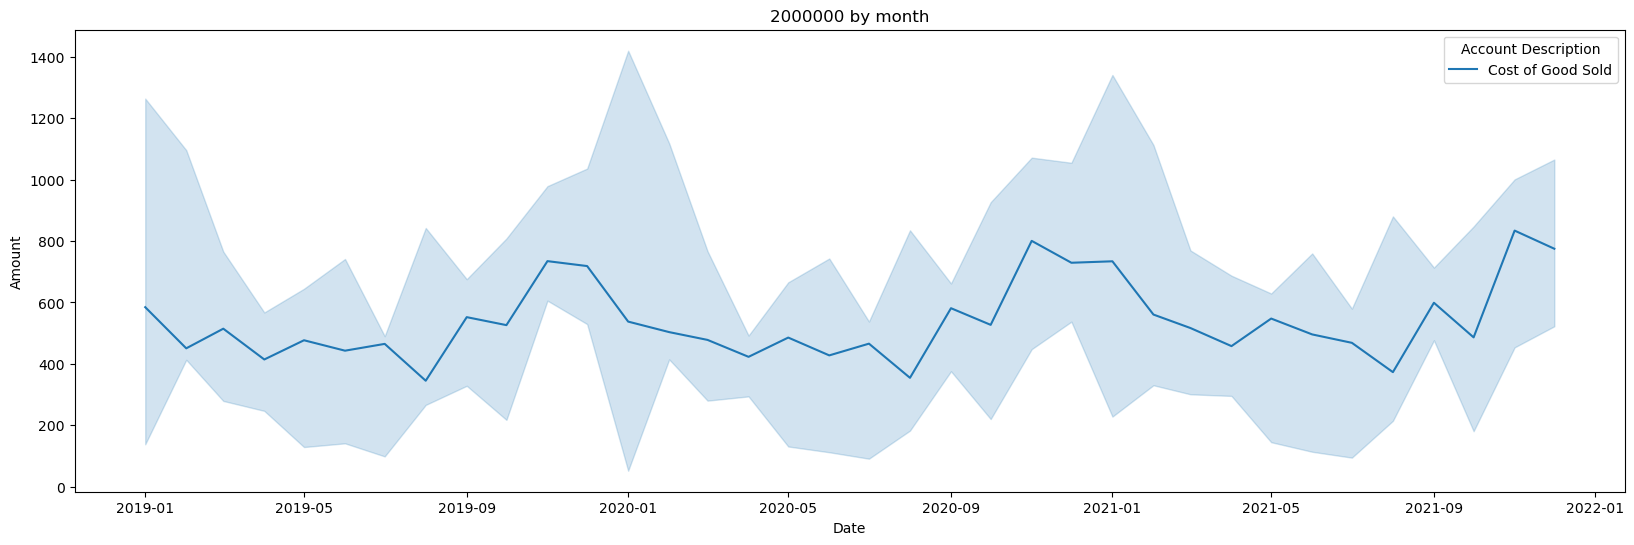

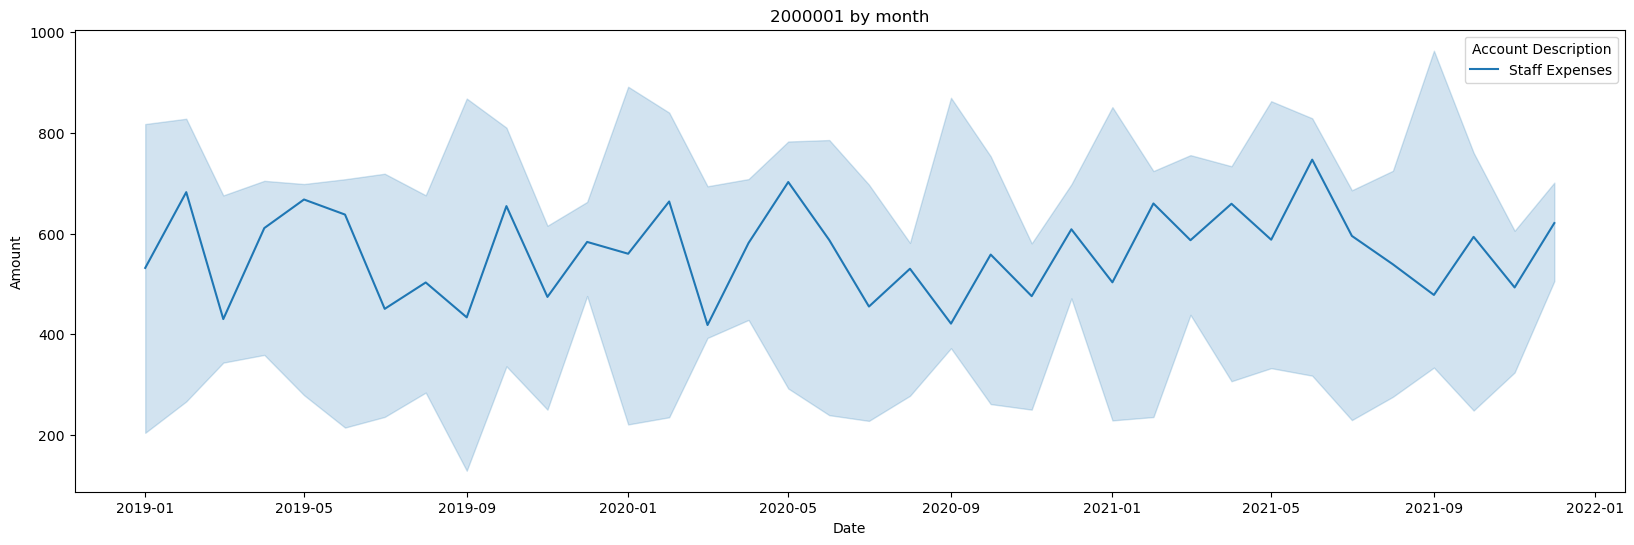

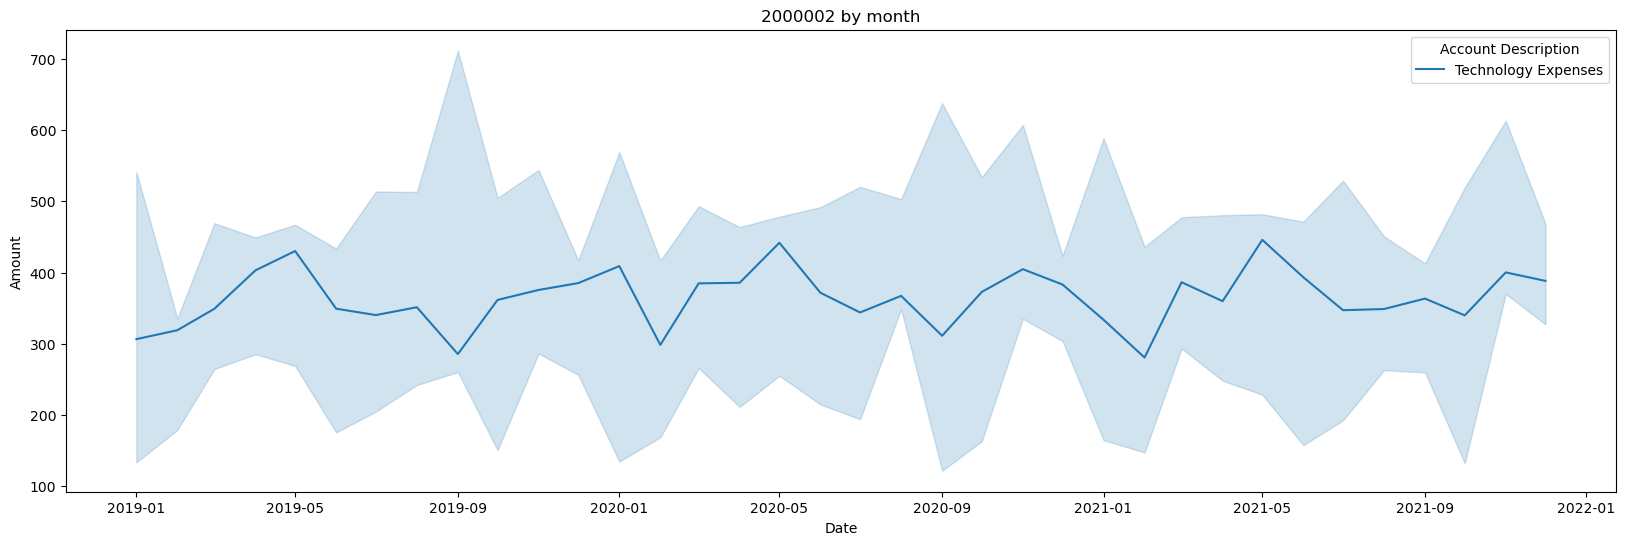

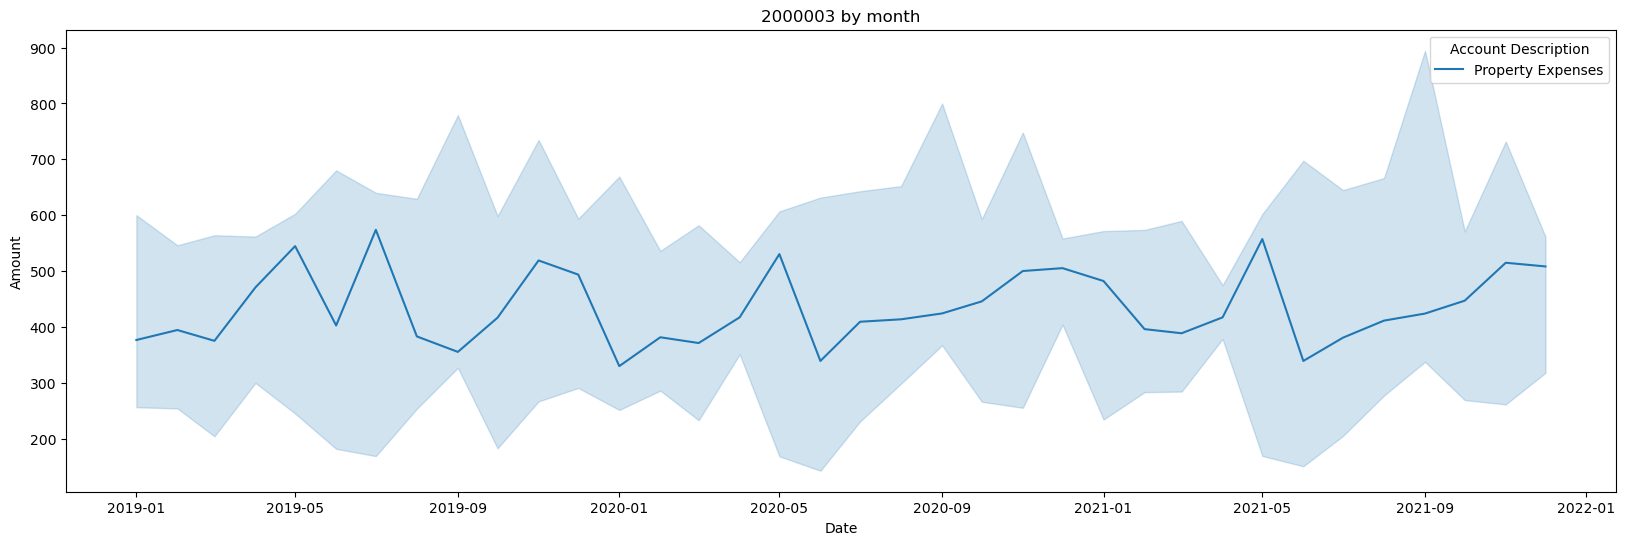

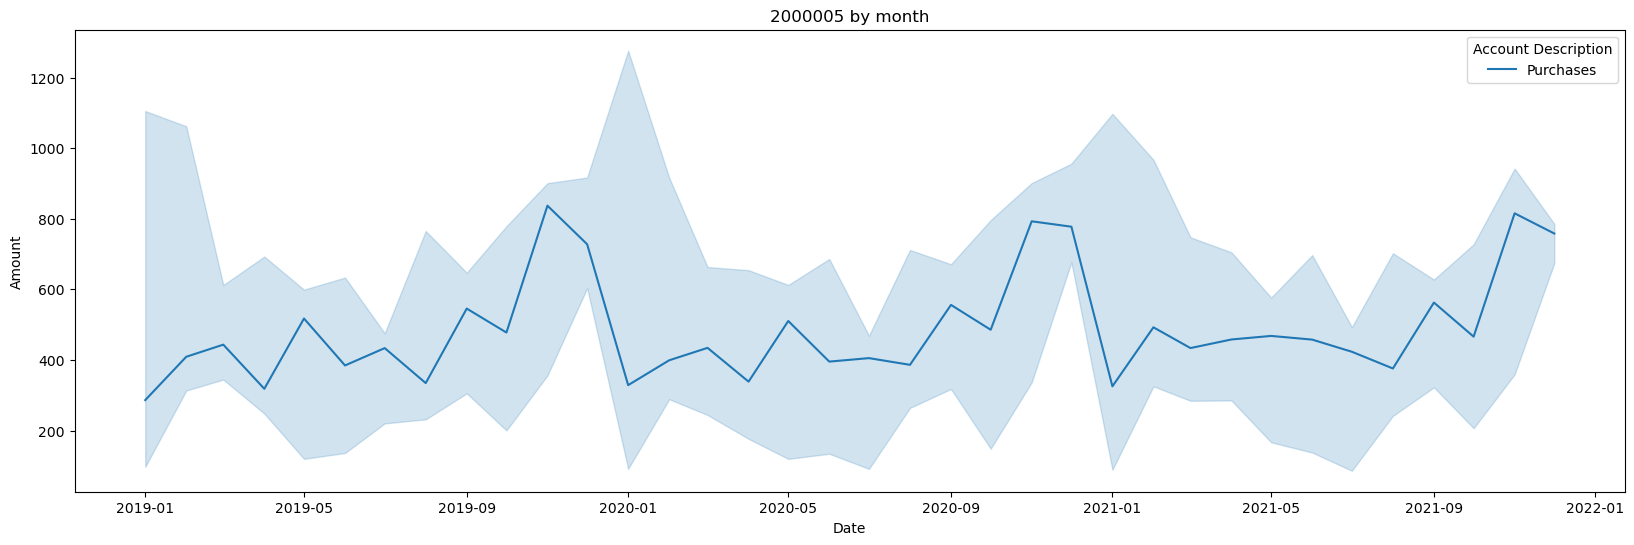

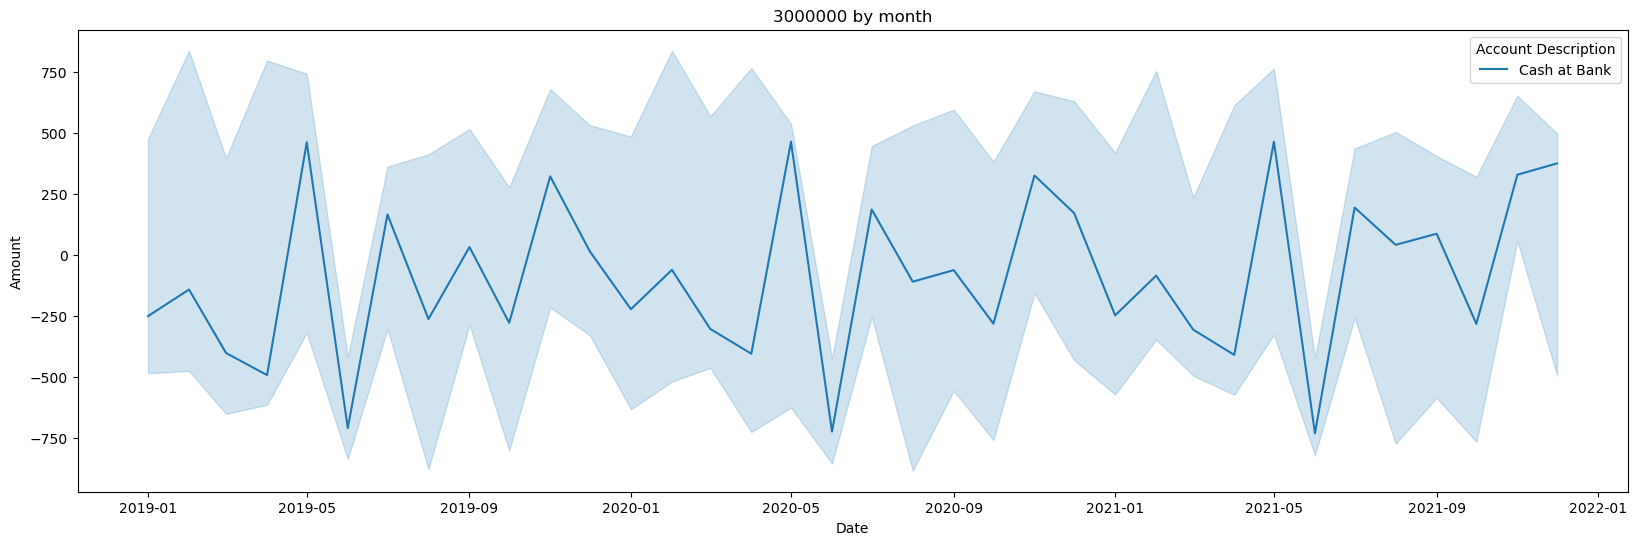

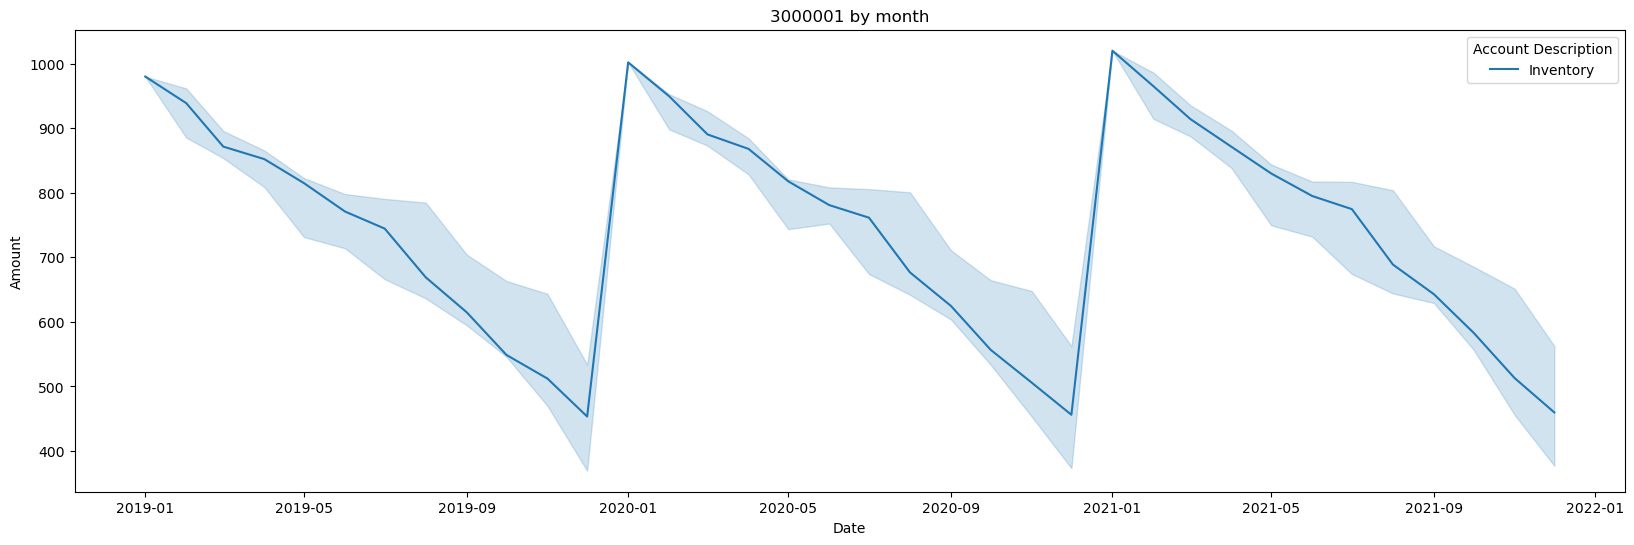

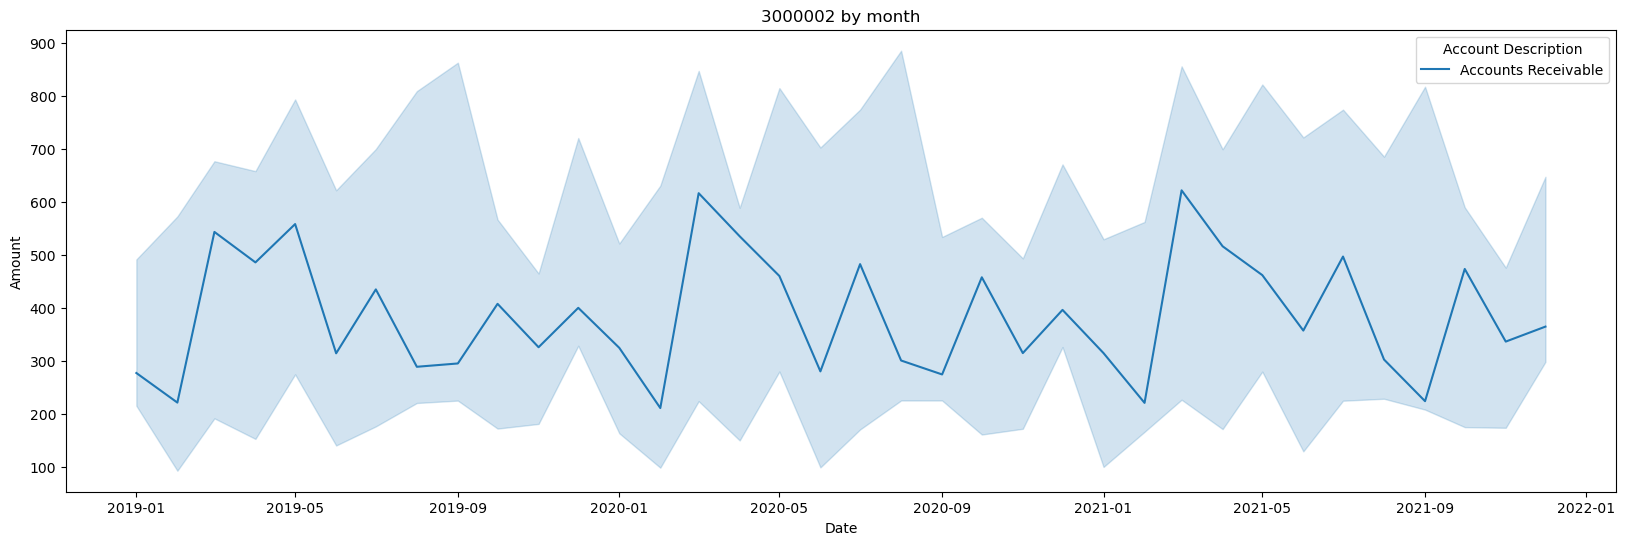

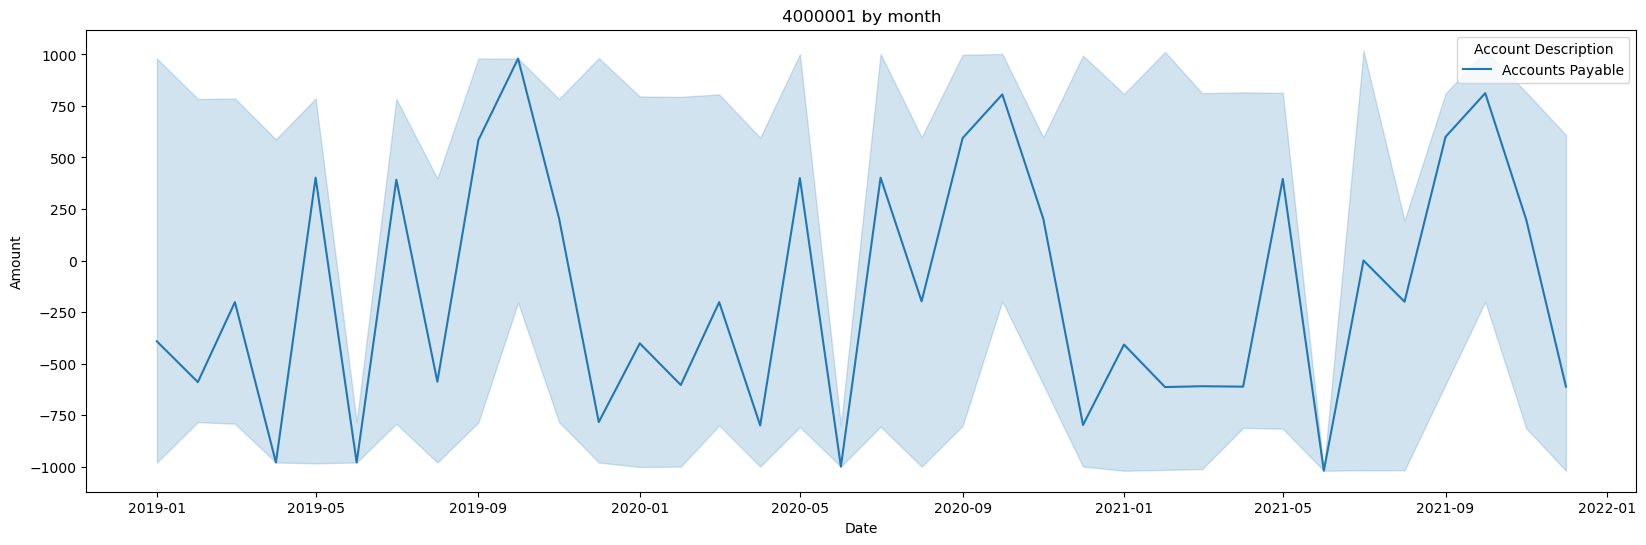

In [26]:
for account in data_frame['Account'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data= data_frame[data_frame['Account'] == account]).set_title('{} by month'.format(account))
    plt.show()

In [27]:
### We will filter out the account 3000001 since it doesnt follow the same line of trends which will make it troublesome in making a ML model
data_frame = data_frame[data_frame['Account'] != 3000001]

In [28]:
data_frame['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000002, 4000001])

### Converting the fields to their correct data types

In [29]:
data_frame.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [30]:
data_frame['Account'] = 'ACC' + data_frame['Account'].astype(str)

In [31]:
data_frame['Account'].unique()

array(['ACC1000000', 'ACC1000001', 'ACC1000002', 'ACC1000004',
       'ACC2000000', 'ACC2000001', 'ACC2000002', 'ACC2000003',
       'ACC2000005', 'ACC3000000', 'ACC3000002', 'ACC4000001'],
      dtype=object)

In [32]:
data_frame

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
0,2019,Jan,CC100,ACC1000000,Product Sales,Revenue,1344.051,1,1,2019-01-01
1,2019,Jan,CC100,ACC1000001,Licensing Revenue,Revenue,480.968,1,1,2019-01-01
2,2019,Jan,CC100,ACC1000002,Service Revenue,Revenue,650.820,1,1,2019-01-01
3,2019,Jan,CC100,ACC1000004,Fee Revenue,Revenue,339.360,1,1,2019-01-01
4,2019,Jan,CC100,ACC2000000,Cost of Good Sold,Expense,1125.328,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4206,2021,Dec,CC302,ACC2000003,Property Expenses,Expense,540.060,12,1,2021-12-01
4207,2021,Dec,CC302,ACC2000005,Purchases,Expense,698.121,12,1,2021-12-01
4208,2021,Dec,CC302,ACC3000000,Cash at Bank,Asset,-282.056,12,1,2021-12-01
4210,2021,Dec,CC302,ACC3000002,Accounts Receivable,Asset,1152.680,12,1,2021-12-01


In [33]:
data_frame['Year'] = data_frame['Year'].astype(str)

In [34]:
data_frame.dtypes

Year                           object
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [35]:
data_frame.drop(['Period', 'Day', 'Date'], axis = 1, inplace = True)

In [36]:
data_frame.dtypes

Year                    object
Month                   object
Cost Centre             object
Account                 object
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [37]:
data_frame['Account Val'] = data_frame['Account'] + data_frame['Account Description']

In [38]:
data_frame.drop(['Account Val', 'Account Description'], axis =1, inplace=True)

In [39]:
data_frame

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Expense,1125.328
...,...,...,...,...,...,...
4206,2021,Dec,CC302,ACC2000003,Expense,540.060
4207,2021,Dec,CC302,ACC2000005,Expense,698.121
4208,2021,Dec,CC302,ACC3000000,Asset,-282.056
4210,2021,Dec,CC302,ACC3000002,Asset,1152.680


#### One Hot - Encoding

In [40]:
data_frame = pd.get_dummies(data_frame, dtype='uint8')

In [41]:
data_frame

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account_ACC2000002,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4206,540.060,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4207,698.121,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4208,-282.056,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4210,1152.680,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [42]:
data_frame.dtypes

Amount                    float64
Year_2019                   uint8
Year_2020                   uint8
Year_2021                   uint8
Month_Apr                   uint8
Month_Aug                   uint8
Month_Dec                   uint8
Month_Feb                   uint8
Month_Jan                   uint8
Month_Jul                   uint8
Month_Jun                   uint8
Month_Mar                   uint8
Month_May                   uint8
Month_Nov                   uint8
Month_Oct                   uint8
Month_Sep                   uint8
Cost Centre_CC100           uint8
Cost Centre_CC101           uint8
Cost Centre_CC102           uint8
Cost Centre_CC200           uint8
Cost Centre_CC201           uint8
Cost Centre_CC202           uint8
Cost Centre_CC300           uint8
Cost Centre_CC301           uint8
Cost Centre_CC302           uint8
Account_ACC1000000          uint8
Account_ACC1000001          uint8
Account_ACC1000002          uint8
Account_ACC1000004          uint8
Account_ACC200

4. Modelling

5. Evaluation

6. Deployemnt